# Objectives


Performing a time series analysis on Passenger data of airline using seasonal Decomposition.
Data used is the monthly data collected between 1949-01-01 and 1960-01-01.

Performing additive and multiplicative predictive models and checking their observations.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.seasonal import seasonal_decompose


from google.colab import drive
drive.mount('/content/drive')

In [42]:
df = pd.read_csv('/content/drive/My Drive/AirPassenger.csv',parse_dates=['Year-Month'],index_col='Year-Month')
df.sample(5)

,Pax
Year-Month,
1955-01-01,242
1953-01-01,196
1959-05-01,420
1957-12-01,336
1959-01-01,360


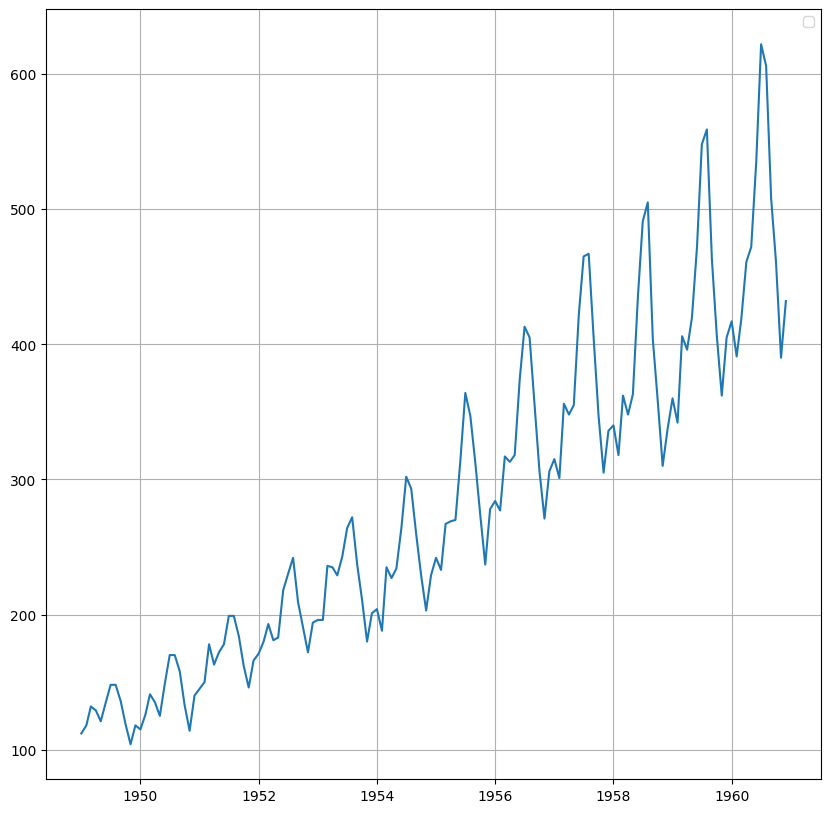

In [106]:
#Plotting seasonal Data
#building a plot
import pylab

pylab.rcParams['figure.figsize']=10,10

plt.plot(df)
plt.grid()
plt.legend(loc='best')
plt.show()


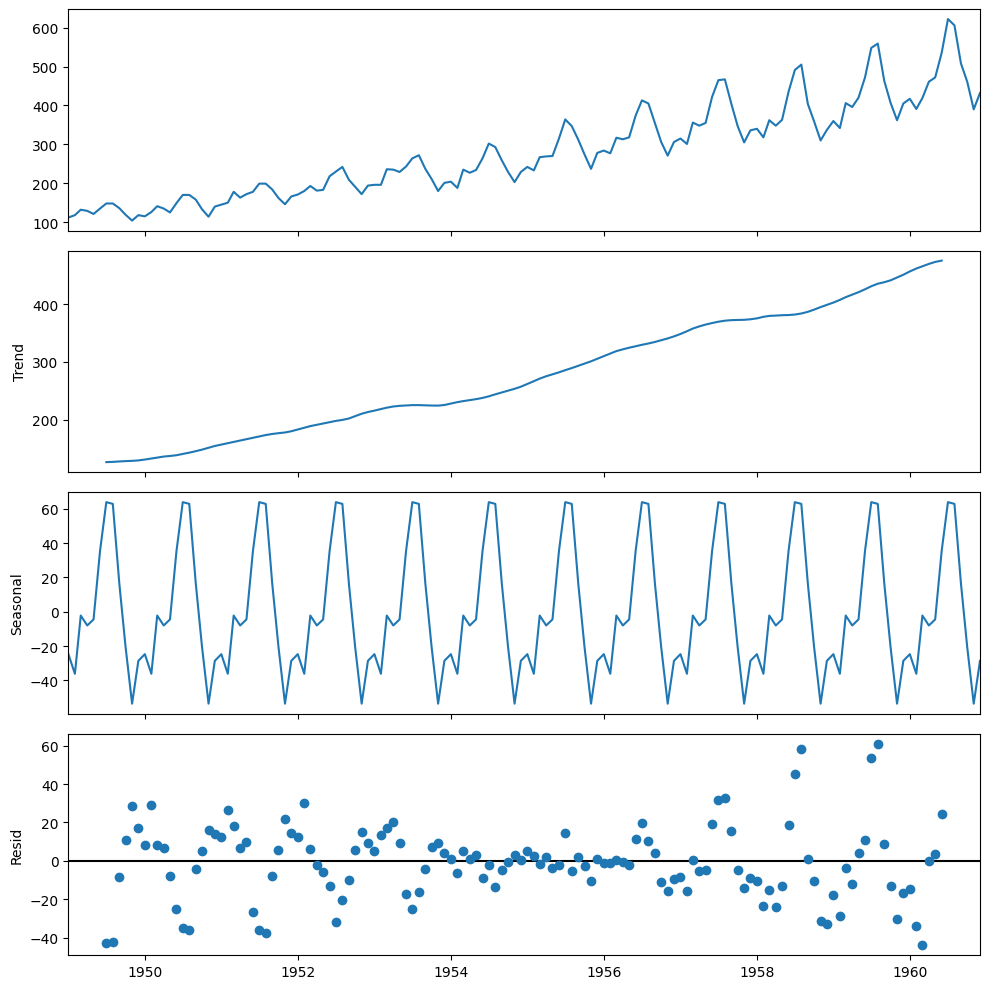

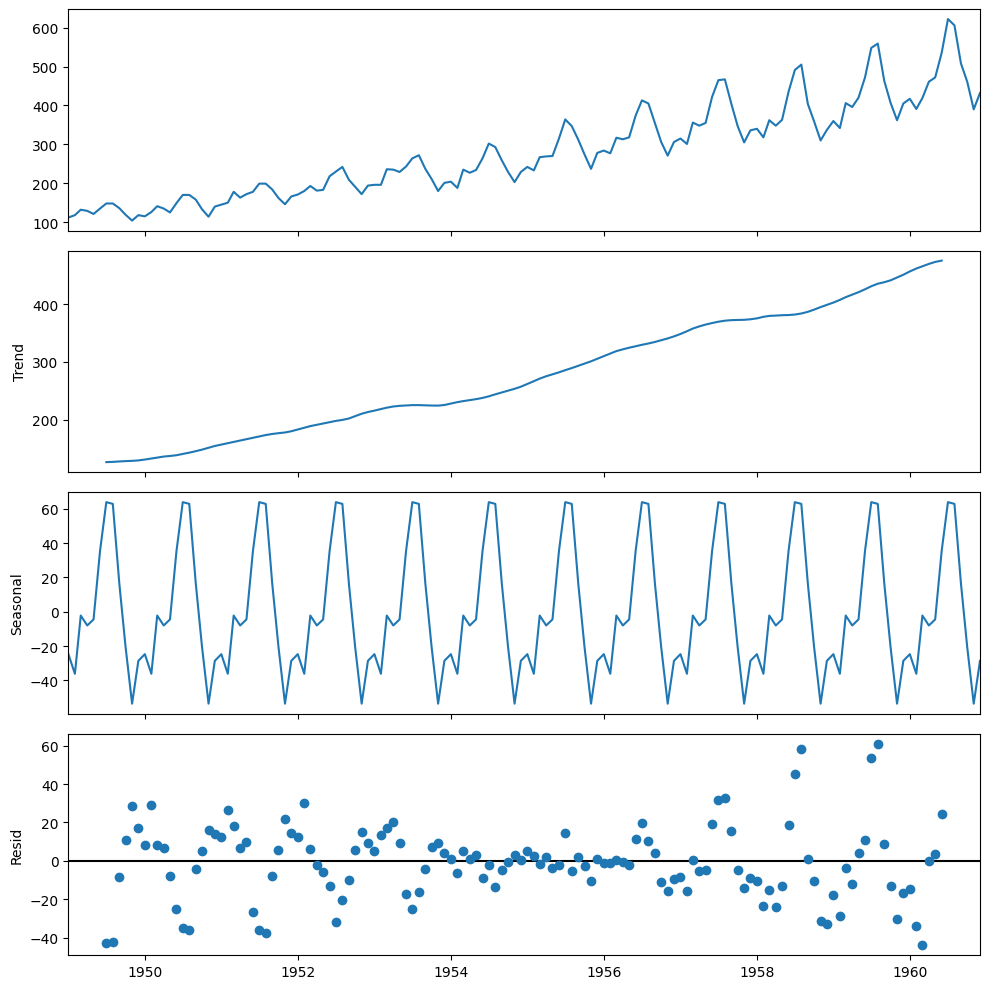

In [43]:
df1_decompose = seasonal_decompose(df,model='additive',period=12)


#building a plot

pylab.rcParams['figure.figsize']=10,10
df1_decompose.plot()

In [71]:
#Let us check if observed value and (predicted value) are same

print('Observed Value ',df.loc['1959-01-01','Pax'])

predicted = df1_decompose.trend.loc['1959-01-01'] + df1_decompose.seasonal.loc['1959-01-01'] + df1_decompose.resid.loc['1959-01-01']
print('Prdicted value',predicted)

Observed Value  360
Prdicted value 360.0


In [ ]:
#We observe that Observed Value and Predicted Value are same

# Multiplicative Model Decompose

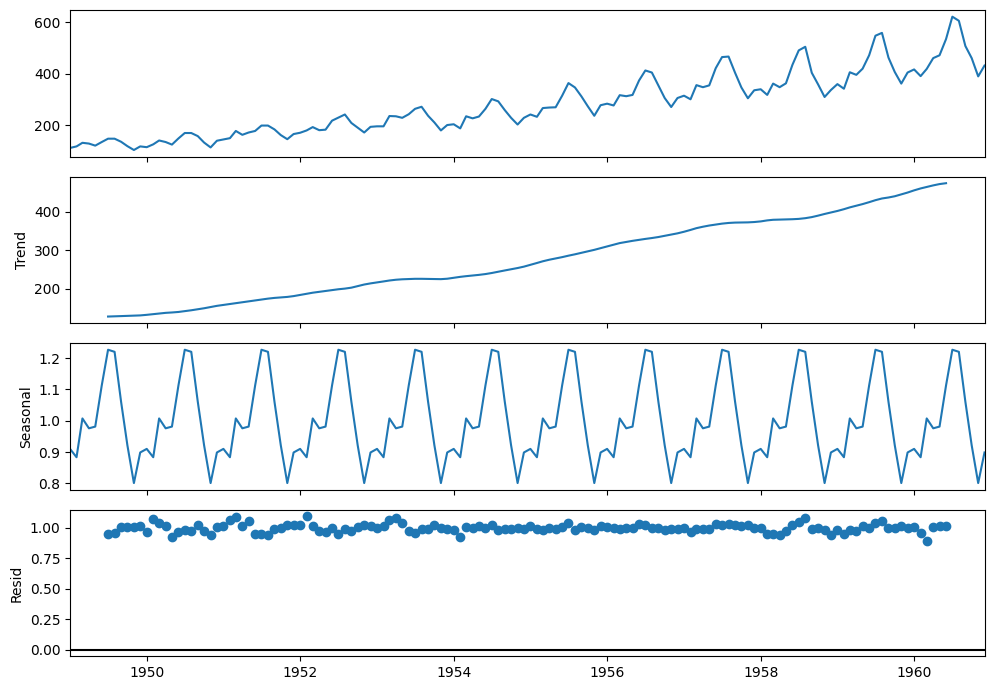

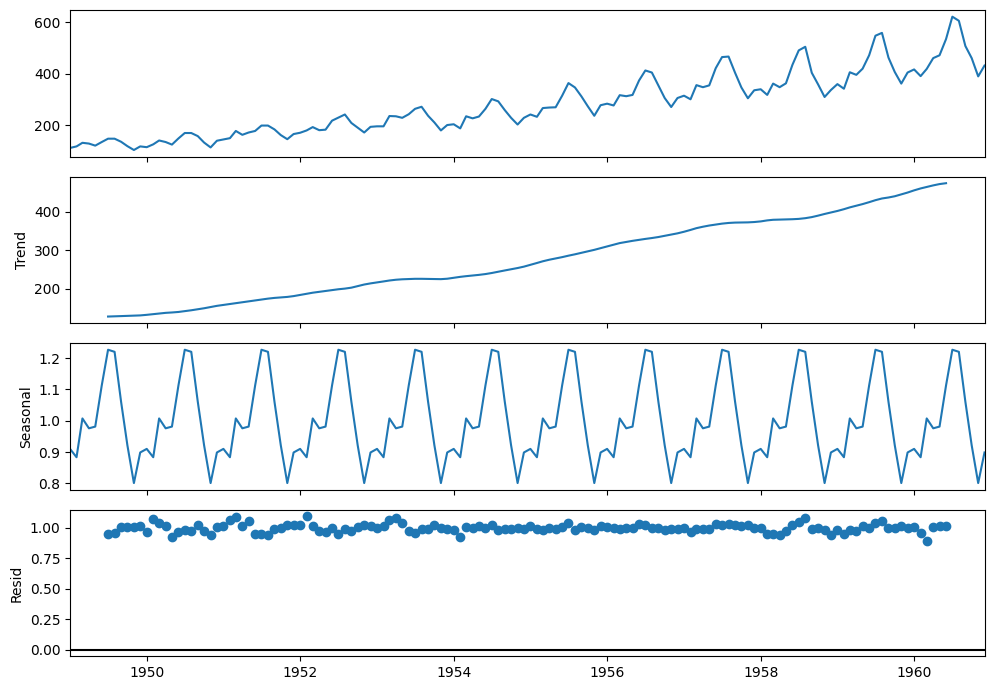

In [35]:
df2_decompose = seasonal_decompose(df,model='multiplicative',period=12)

pylab.rcParams['figure.figsize'] = 10,7
df2_decompose.plot()


In [101]:
#print not nan value
 #in trend
not_nan = df2_decompose.trend.notnull()
df2_decompose.trend[not_nan].loc['1960']

,trend
Year-Month,
1960-01-01,456.333333
1960-02-01,461.375000
1960-03-01,465.208333
1960-04-01,469.333333
1960-05-01,472.750000
1960-06-01,475.041667


In [102]:
#print not nan value
 #in season
not_nan = df2_decompose.seasonal.notnull()
df2_decompose.seasonal[not_nan].loc['1960']

,seasonal
Year-Month,
1960-01-01,0.910230
1960-02-01,0.883625
1960-03-01,1.007366
1960-04-01,0.975906
1960-05-01,0.981378
1960-06-01,1.112776
1960-07-01,1.226556
1960-08-01,1.219911
1960-09-01,1.060492


In [103]:
#print not nan value
 #in residue
not_nan = df2_decompose.resid.notnull()
df2_decompose.resid[not_nan].loc['1960']

,resid
Year-Month,
1960-01-01,1.003928
1960-02-01,0.959079
1960-03-01,0.894086
1960-04-01,1.006495
1960-05-01,1.017359
1960-06-01,1.012079


In [105]:
#Let us check if observed value and Predicted value return the same result

print('Observed Value ',df.loc['1960-01-01','Pax'])
predicted = df2_decompose.trend.loc['1960-01-01'] * df2_decompose.seasonal.loc['1960-01-01'] * df2_decompose.resid.loc['1960-01-01']
print('Prdicted value',predicted)



Observed Value  417
Prdicted value 417.0


We observe that Predicted Value and Observed value are almost the same.

# Pax Log value

In [38]:
df_log = df.copy()

df_log['Pax'] = np.log(df_log['Pax'])
df_log

,Pax
Year-Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


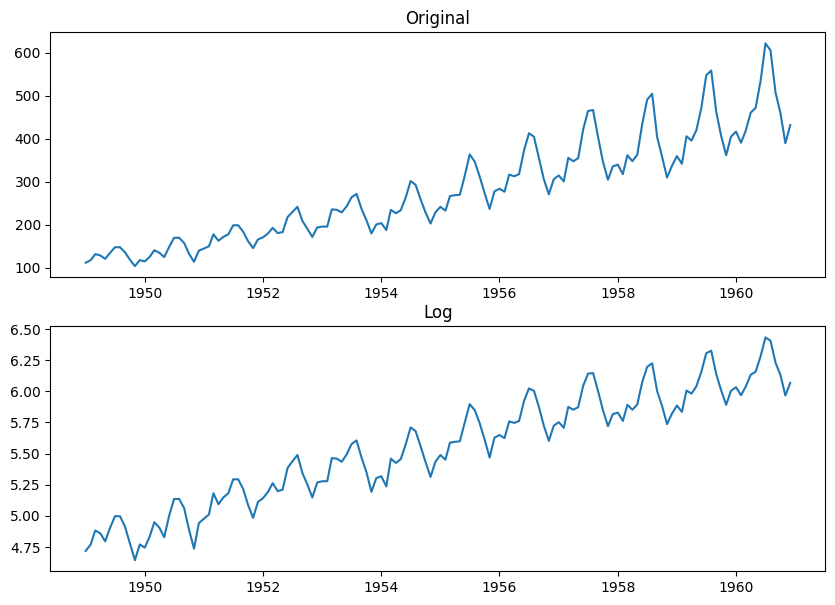

In [41]:
#Plot logrithamic customer value

plt.subplot(2,1,1)
plt.title('Original')
plt.plot(df)

plt.subplot(2,1,2)
plt.title('Log')
plt.plot(df_log)

plt.show()

# Observations and Conclusion

The residual Pattern in additive model shows pattern
wheres residual pattern in multiplicative model shows no pattern.

Considering the fact the residues are almost the same
the best method of seasonal decomposition for this time series
data is 'Multiplicative model'